In [1]:
!gdown 1OpVJhEYGEIHES5ZFWDzWBQYrjf0RXemq

Downloading...
From: https://drive.google.com/uc?id=1OpVJhEYGEIHES5ZFWDzWBQYrjf0RXemq
To: /content/BBRI.csv
100% 252k/252k [00:00<00:00, 3.62MB/s]


In [2]:
# Import with pandas
import pandas as pd
# Parse dates and set date column to index
df = pd.read_csv("/content/BBRI.csv",
                 parse_dates=["date"],
                 index_col=["date"]) # parse the date column (tell pandas column 1 is a datetime)
df.head()

,previous,open_price,first_trade,high,low,close,change,volume,value,frequency,...,bid_volume,listed_shares,tradeble_shares,weight_for_index,foreign_sell,foreign_buy,delisting_date,non_regular_volume,non_regular_value,non_regular_frequency
date,,,,,,,,,,,,,,,,,,,,,
2019-07-29,4440.0,4480.0,4480.0,4480.0,4440.0,4460.0,20.0,91877000.0,4.098494e+11,7033.0,...,10409200.0,1.221124e+11,1.221124e+11,1.221124e+11,81038800.0,42272500.0,NaN,2160852.0,9.629730e+09,9.0
2019-07-30,4460.0,4500.0,4500.0,4500.0,4460.0,4500.0,40.0,68755800.0,3.086996e+11,5799.0,...,468200.0,1.221124e+11,1.221124e+11,1.221124e+11,29698800.0,31106400.0,NaN,14816503.0,6.601430e+10,21.0
2019-07-31,4500.0,4500.0,4500.0,4510.0,4450.0,4480.0,-20.0,105834600.0,4.738443e+11,6659.0,...,16700.0,1.221124e+11,1.221124e+11,1.221124e+11,92869100.0,64220800.0,NaN,56365669.0,2.527370e+11,22.0
2019-08-01,4480.0,4490.0,4490.0,4510.0,4410.0,4450.0,-30.0,143626600.0,6.393417e+11,12051.0,...,1935200.0,1.221124e+11,1.221124e+11,1.221124e+11,85420900.0,64853300.0,NaN,21887927.0,9.768039e+10,15.0
2019-08-02,4450.0,4400.0,4400.0,4470.0,4390.0,4450.0,0.0,119342500.0,5.291418e+11,7231.0,...,2775800.0,1.221124e+11,1.221124e+11,1.221124e+11,65417900.0,68705400.0,NaN,16419027.0,7.282188e+10,13.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1054 entries, 2019-07-29 to 2023-11-15
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   previous               1054 non-null   float64
 1   open_price             1054 non-null   float64
 2   first_trade            1054 non-null   float64
 3   high                   1054 non-null   float64
 4   low                    1054 non-null   float64
 5   close                  1054 non-null   float64
 6   change                 1054 non-null   float64
 7   volume                 1054 non-null   float64
 8   value                  1054 non-null   float64
 9   frequency              1054 non-null   float64
 10  index_individual       1054 non-null   float64
 11  offer                  1054 non-null   float64
 12  offer_volume           1054 non-null   float64
 13  bid                    1054 non-null   float64
 14  bid_volume             1054 non-null  

In [4]:
len(df)

1054

In [5]:
# Only want closing price for each day
bri_prices = pd.DataFrame(df["close"]).rename(columns={"close": "Price"})
bri_prices.head()

,Price
date,
2019-07-29,4460.0
2019-07-30,4500.0
2019-07-31,4480.0
2019-08-01,4450.0
2019-08-02,4450.0


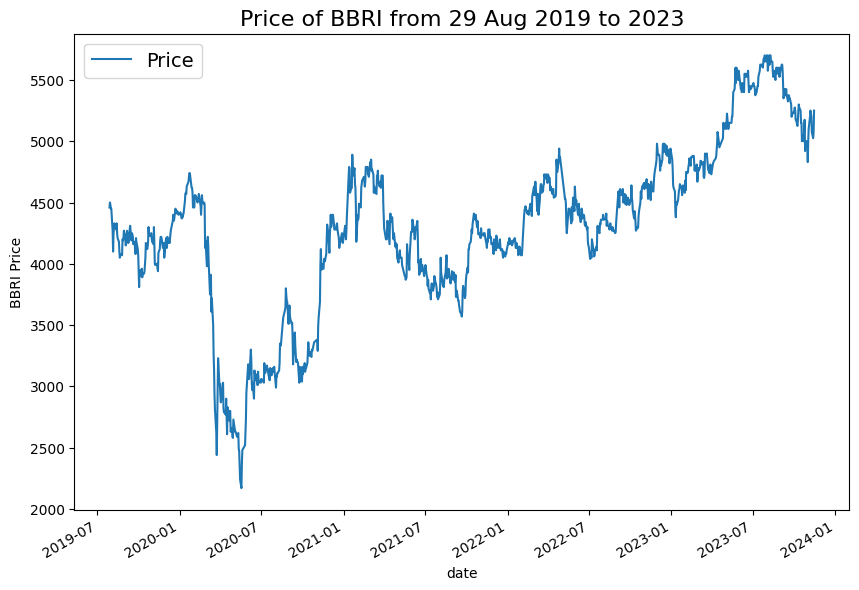

In [6]:
import matplotlib.pyplot as plt
bri_prices.plot(figsize=(10, 7))
plt.ylabel("BBRI Price")
plt.title("Price of BBRI from 29 Aug 2019 to 2023", fontsize=16)
plt.legend(fontsize=14);

In [7]:
import csv
from datetime import datetime

timesteps = []
bri_price = []
with open("/content/BBRI.csv", "r") as f:
  csv_reader = csv.reader(f, delimiter=",") # read in the target CSV
  next(csv_reader) # skip first line (this gets rid of the column titles)
  for line in csv_reader:
    timesteps.append(datetime.strptime(line[0], "%Y-%m-%dT%H:%M:%S")) # get the dates as dates (not strings), strptime = string parse time
    bri_price.append(float(line[6])) # get the closing price as float

# View first 10 of each
timesteps[:10], bri_price[:10]

([datetime.datetime(2019, 7, 29, 0, 0),
  datetime.datetime(2019, 7, 30, 0, 0),
  datetime.datetime(2019, 7, 31, 0, 0),
  datetime.datetime(2019, 8, 1, 0, 0),
  datetime.datetime(2019, 8, 2, 0, 0),
  datetime.datetime(2019, 8, 5, 0, 0),
  datetime.datetime(2019, 8, 6, 0, 0),
  datetime.datetime(2019, 8, 7, 0, 0),
  datetime.datetime(2019, 8, 8, 0, 0),
  datetime.datetime(2019, 8, 9, 0, 0)],
 [4460.0,
  4500.0,
  4480.0,
  4450.0,
  4450.0,
  4270.0,
  4100.0,
  4250.0,
  4290.0,
  4330.0])

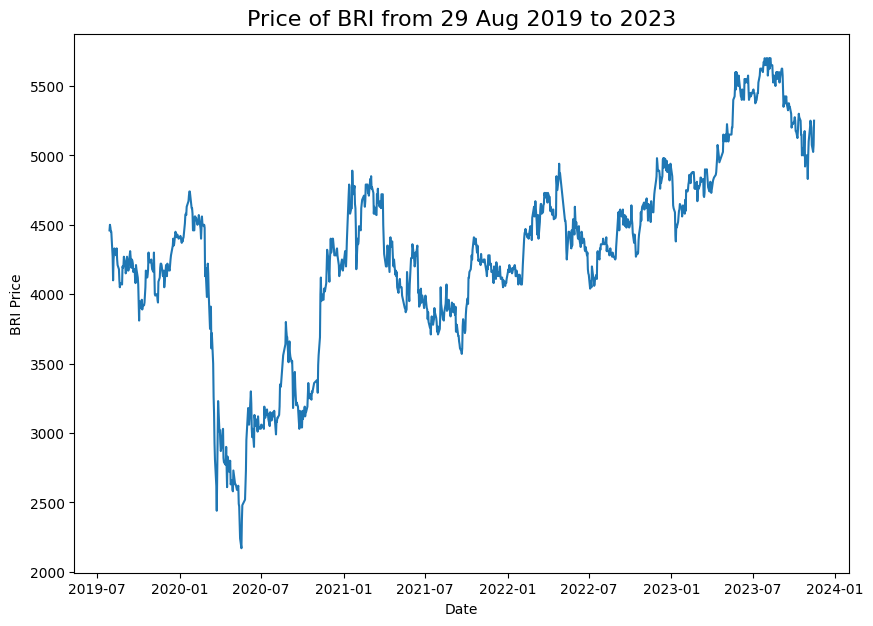

In [8]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 7))
plt.plot(timesteps, bri_price)
plt.title("Price of BRI from 29 Aug 2019 to 2023", fontsize=16)
plt.xlabel("Date")
plt.ylabel("BRI Price");

### Split data

In [9]:
timesteps = bri_prices.index.to_numpy()
prices = bri_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2019-07-29T00:00:00.000000000', '2019-07-30T00:00:00.000000000',
        '2019-07-31T00:00:00.000000000', '2019-08-01T00:00:00.000000000',
        '2019-08-02T00:00:00.000000000', '2019-08-05T00:00:00.000000000',
        '2019-08-06T00:00:00.000000000', '2019-08-07T00:00:00.000000000',
        '2019-08-08T00:00:00.000000000', '2019-08-09T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([4460., 4500., 4480., 4450., 4450., 4270., 4100., 4250., 4290.,
        4330.]))

In [10]:
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(843, 211, 843, 211)

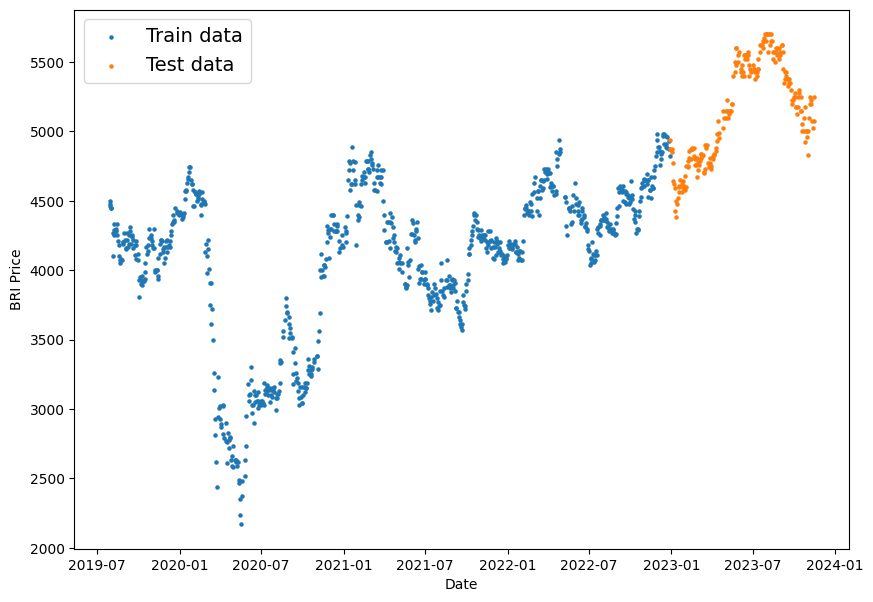

In [11]:
# Plot correctly made splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BRI Price")
plt.legend(fontsize=14)
plt.show();

### Plotting function

In [12]:
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BRI Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

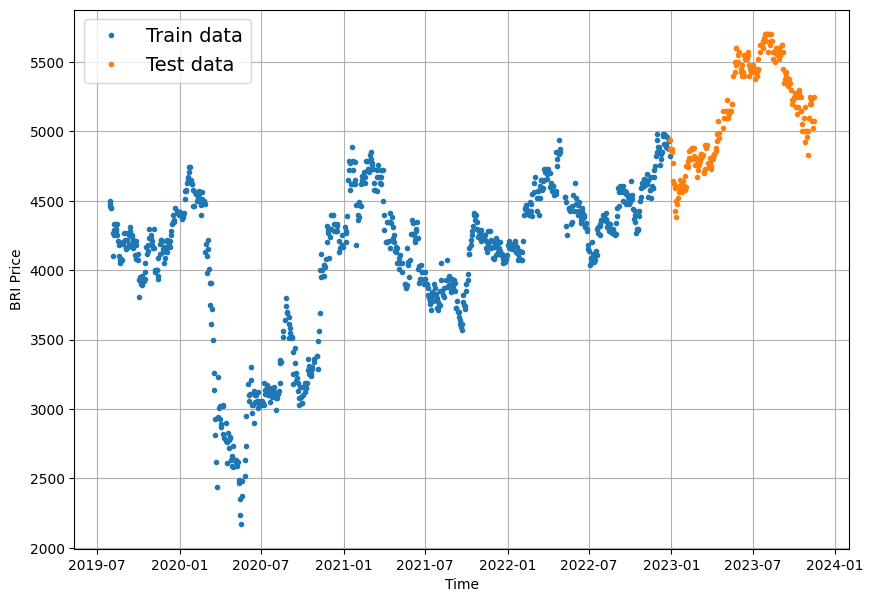

In [13]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

### Model 0 Nive forecast

In [14]:
# Create a naïve forecast
naive_forecast = y_test[:-1]
naive_forecast[:10], naive_forecast[-10:]

(array([4870., 4940., 4870., 4850., 4770., 4640., 4620., 4590., 4430.,
        4380.]),
 array([4830., 5000., 5100., 5200., 5250., 5225., 5200., 5075., 5025.,
        5075.]))

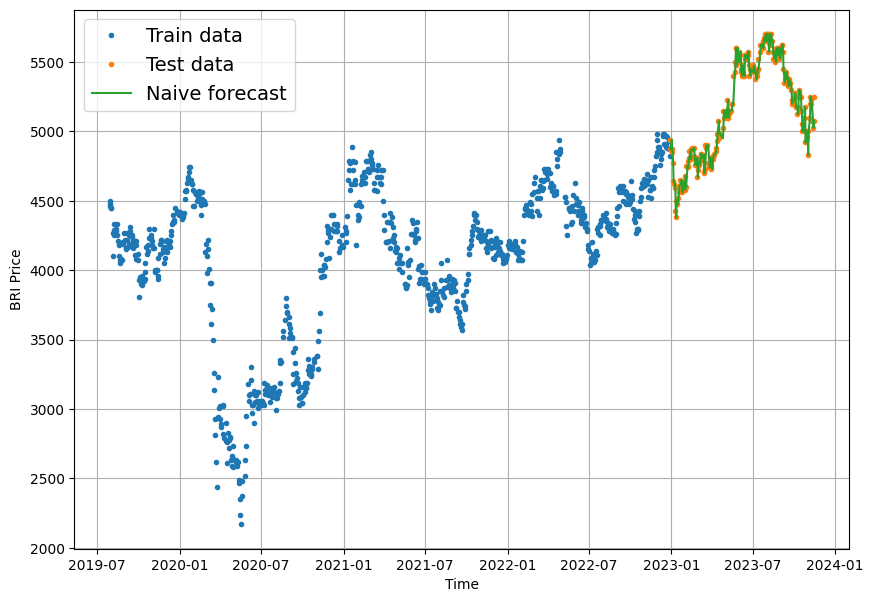

In [15]:
# Plot naive forecast
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive forecast");

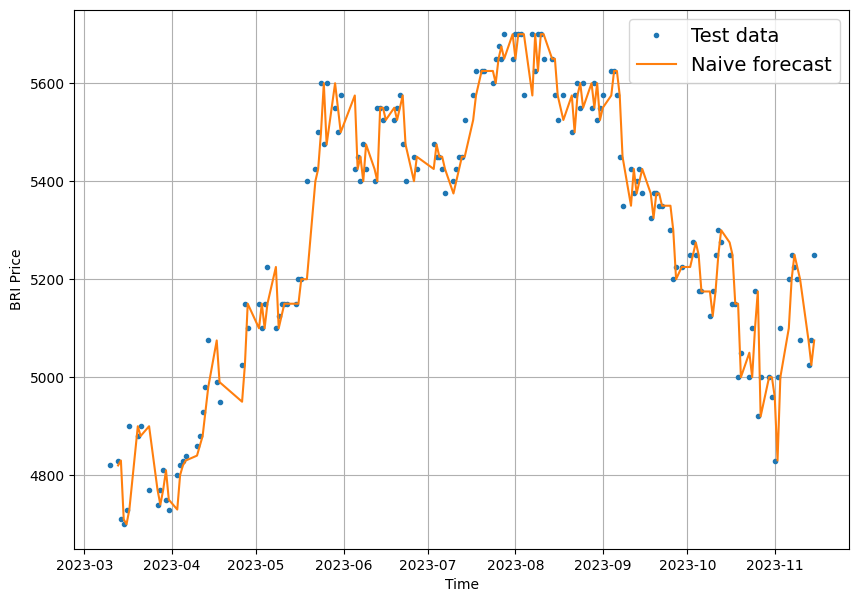

In [16]:
plt.figure(figsize=(10, 7))
offset = 50 # offset the values by 300 timesteps
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast");

### Evaluating a time series model

In [17]:
import tensorflow as tf

In [18]:
def mean_absolute_scaled_error(y_true, y_pred):
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

In [19]:
def evaluate_preds(y_true, y_pred):
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [20]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 52.238094,
 'mse': 4601.6665,
 'rmse': 67.83559,
 'mape': 1.0202568,
 'mase': 1.0016295}

In [21]:
# Find average price of BRI in test dataset
tf.reduce_mean(y_test).numpy()

5156.729857819905

### Windowing dataset

In [22]:
HORIZON = 1
WINDOW_SIZE = 7

In [23]:
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [24]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [25]:
# Create function to view NumPy arrays as windows
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [26]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(1047, 1047)

In [27]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [4460. 4500. 4480. 4450. 4450. 4270. 4100.] -> Label: [4250.]
Window: [4500. 4480. 4450. 4450. 4270. 4100. 4250.] -> Label: [4290.]
Window: [4480. 4450. 4450. 4270. 4100. 4250. 4290.] -> Label: [4330.]


In [28]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [5000. 5100. 5200. 5250. 5225. 5200. 5075.] -> Label: [5025.]
Window: [5100. 5200. 5250. 5225. 5200. 5075. 5025.] -> Label: [5075.]
Window: [5200. 5250. 5225. 5200. 5075. 5025. 5075.] -> Label: [5250.]


### Turning windows into training and test sets

In [29]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) #to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [30]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(837, 210, 837, 210)

In [31]:
train_windows[:5], train_labels[:5]

(array([[4460., 4500., 4480., 4450., 4450., 4270., 4100.],
        [4500., 4480., 4450., 4450., 4270., 4100., 4250.],
        [4480., 4450., 4450., 4270., 4100., 4250., 4290.],
        [4450., 4450., 4270., 4100., 4250., 4290., 4330.],
        [4450., 4270., 4100., 4250., 4290., 4330., 4300.]]),
 array([[4250.],
        [4290.],
        [4330.],
        [4300.],
        [4280.]]))

### Make a modelling checkpoint

In [32]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file

### Model 1: Dense model (window = 7, horizon = 1)

In [33]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation
], name="model_1_dense") # give the model a name so we can save it

# Compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# Fit model
model_1.fit(x=train_windows, # train windows of 7 timesteps of BRI prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)]) # create ModelCheckpoint callback to save best model

Epoch 1/100
7/7 [==============================] - 6s 141ms/step - loss: 634.4880 - mae: 634.4880 - val_loss: 484.9136 - val_mae: 484.9137
Epoch 2/100
7/7 [==============================] - 0s 64ms/step - loss: 300.7308 - mae: 300.7308 - val_loss: 178.4830 - val_mae: 178.4830
Epoch 3/100
7/7 [==============================] - 0s 69ms/step - loss: 181.7979 - mae: 181.7979 - val_loss: 111.5291 - val_mae: 111.5291
Epoch 4/100
7/7 [==============================] - 0s 7ms/step - loss: 126.9498 - mae: 126.9498 - val_loss: 120.7223 - val_mae: 120.7223
Epoch 5/100
7/7 [==============================] - 0s 66ms/step - loss: 110.0414 - mae: 110.0414 - val_loss: 98.0546 - val_mae: 98.0546
Epoch 6/100
7/7 [==============================] - 0s 62ms/step - loss: 95.8484 - mae: 95.8484 - val_loss: 80.4470 - val_mae: 80.4470
Epoch 7/100
7/7 [==============================] - 0s 61ms/step - loss: 91.4380 - mae: 91.4380 - val_loss: 77.2595 - val_mae: 77.2595
Epoch 8/100
7/7 [===========================

In [34]:
# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

7/7 [==============================] - 0s 3ms/step - loss: 56.8737 - mae: 56.8737


[56.873680114746094, 56.873680114746094]

In [35]:
# Load in saved best performing model_1 and evaluate on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

7/7 [==============================] - 0s 3ms/step - loss: 56.8737 - mae: 56.8737


[56.873680114746094, 56.873680114746094]

### Making forecasts with a model (on the test dataset)

In [36]:
def make_preds(model, input_data):
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [37]:
# Make predictions using model_1 on the test dataset and view the results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

7/7 [==============================] - 0s 3ms/step


(210,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([4843.1445, 4897.7163, 4879.337 , 4856.624 , 4815.2817, 4737.225 ,
        4654.1294, 4611.1914, 4511.5737, 4420.422 ], dtype=float32)>)

In [38]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_1_preds)
model_1_results

{'mae': 56.87368,
 'mse': 5450.153,
 'rmse': 73.82515,
 'mape': 1.1159893,
 'mase': 1.0905137}

In [39]:
naive_results

{'mae': 52.238094,
 'mse': 4601.6665,
 'rmse': 67.83559,
 'mape': 1.0202568,
 'mase': 1.0016295}

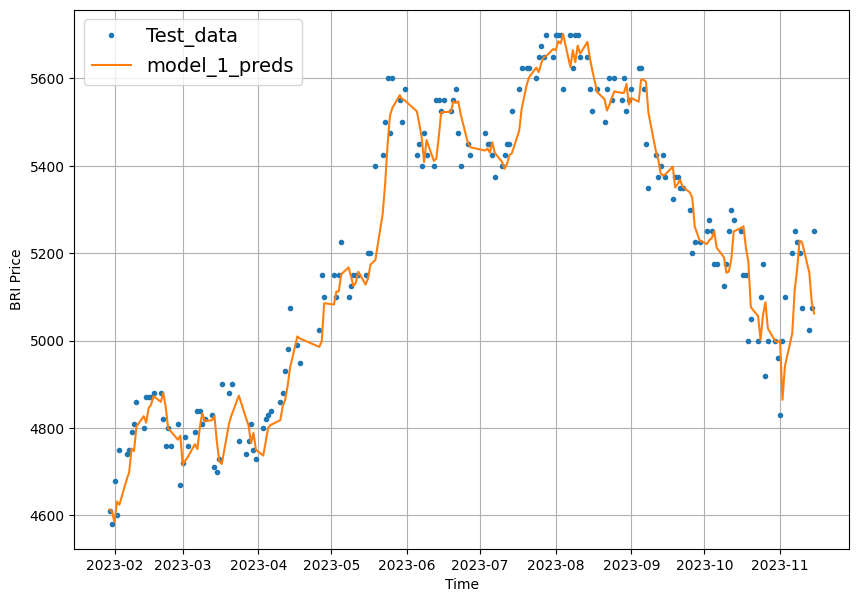

In [40]:
offset = 20
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")

### Model 2: Dense (window = 30, horizon = 1)

In [41]:
HORIZON = 1 # predict one step at a time
WINDOW_SIZE = 30 # use 30 timesteps in the past

In [42]:
# Make windowed data with appropriate horizon and window sizes
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(1024, 1024)

In [43]:
# Make train and testing windows
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(819, 205, 819, 205)

In [44]:
tf.random.set_seed(42)

# Create model (same model as model 1 but data input will be different)
model_2 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON) # need to predict horizon number of steps into the future
], name="model_2_dense")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_2.name)])

In [45]:
# Evaluate model 2 preds
model_2.evaluate(test_windows, test_labels)

7/7 [==============================] - 0s 3ms/step - loss: 86.5415


86.5415267944336

In [46]:
# Load in best performing model
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

7/7 [==============================] - 0s 3ms/step - loss: 61.0573


61.057315826416016

In [47]:
# Get forecast predictions
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

7/7 [==============================] - 0s 2ms/step


In [48]:
# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels), # remove 1 dimension of test labels
                                 y_pred=model_2_preds)
model_2_results

{'mae': 61.057316,
 'mse': 6243.334,
 'rmse': 79.01477,
 'mape': 1.1948899,
 'mase': 1.1772866}

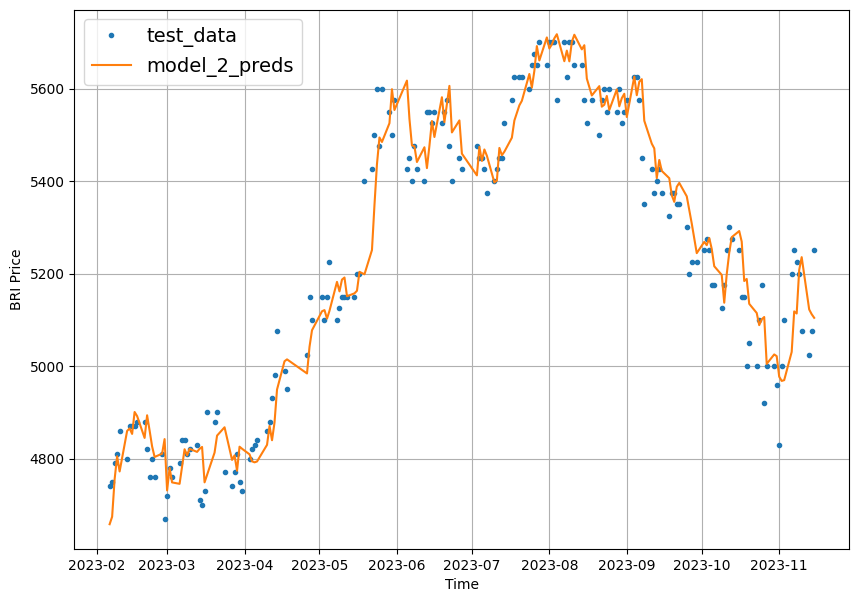

In [49]:
offset = 20
plt.figure(figsize=(10, 7))
# Account for the test_window offset
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_2_preds, start=offset, format="-", label="model_2_preds")

### Model 3: Dense (window = 30, horizon = 7)

In [50]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(1018, 1018)

In [51]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels, test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(814, 204, 814, 204)

In [52]:
tf.random.set_seed(42)

# Create model (same as model_1 except with different data input size)
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [53]:
# How did our model with a larger window size and horizon go?
model_3.evaluate(test_windows, test_labels)

7/7 [==============================] - 0s 4ms/step - loss: 110.6911


110.69111633300781

In [54]:
# Load in best version of model_3 and evaluate
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows, test_labels)

7/7 [==============================] - 0s 3ms/step - loss: 107.6930


107.69304656982422

In [55]:
# The predictions are going to be 7 steps at a time (this is the HORIZON size)
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

7/7 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[4916.5366, 4875.0874, 4904.2544, 4958.134 , 4927.822 , 4896.1934,
        4873.7505],
       [4916.093 , 4877.136 , 4899.313 , 4972.4917, 4918.461 , 4873.065 ,
        4851.3867],
       [4887.536 , 4852.599 , 4888.9624, 4882.467 , 4901.0796, 4870.356 ,
        4862.6787],
       [4871.2676, 4806.666 , 4894.508 , 4857.204 , 4876.6743, 4870.22  ,
        4895.689 ],
       [4867.2188, 4824.1455, 4891.0728, 4870.0234, 4888.0493, 4850.951 ,
        4860.8594]], dtype=float32)>

In [56]:
# Calculate model_3 results - these are going to be multi-dimensional because
# we're trying to predict more than one step at a time.
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([159.81494 , 219.70662 , 266.52554 , 306.0327  , 344.6172  ,
        299.7436  , 275.2313  , 228.6139  , 115.17696 ,  55.677525,
         58.60142 , 102.5482  ,  91.94378 ,  68.31508 ,  87.99596 ,
         75.95089 ,  58.703682,  55.380512,  76.52839 ,  85.96178 ,
        103.45731 , 136.40144 , 128.19908 , 169.85979 , 214.76408 ,
        182.57373 , 196.62605 , 219.96275 , 158.35854 , 161.32986 ,
        129.85902 , 102.331055,  62.271416,  40.794086,  27.799246,
         81.84843 ,  82.02379 , 104.79276 , 104.42285 ,  77.20299 ,
         40.69308 ,  51.975655,  38.42048 ,  55.814453,  57.658833,
         66.36845 ,  64.66741 ,  58.75537 ,  61.98856 ,  81.11    ,
         84.75042 ,  86.78837 ,  60.81027 ,  57.487446,  73.09863 ,
         43.92306 ,  38.871372,  69.2747  ,  48.20166 ,  50.896206,
         54.836567,  67.58587 ,  85.15346 , 103.571846, 124.537735,
        141.17662 , 132.78383 , 145.36775 , 155.87814 , 187.22572 ,
        207.66176 , 202.07324 , 145.97482

### Make our evaluation function work for larger horizons

In [57]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [58]:
# Get model_3 results aggregated to single values
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 107.69305,
 'mse': 19525.244,
 'rmse': 122.646515,
 'mape': 2.1091285,
 'mase': 2.0948913}

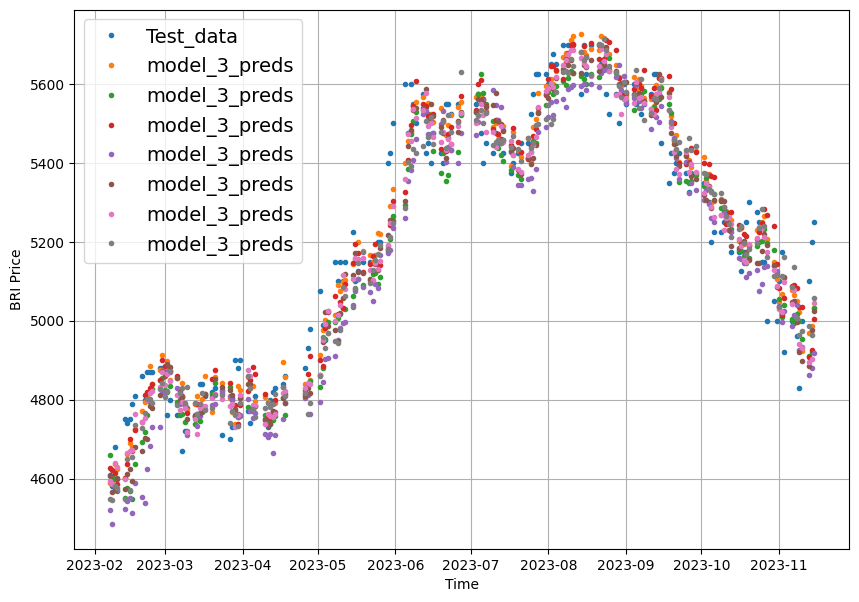

In [59]:
offset = 20
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
# Checking the shape of model_3_preds results in [n_test_samples, HORIZON] (this will screw up the plot)
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")

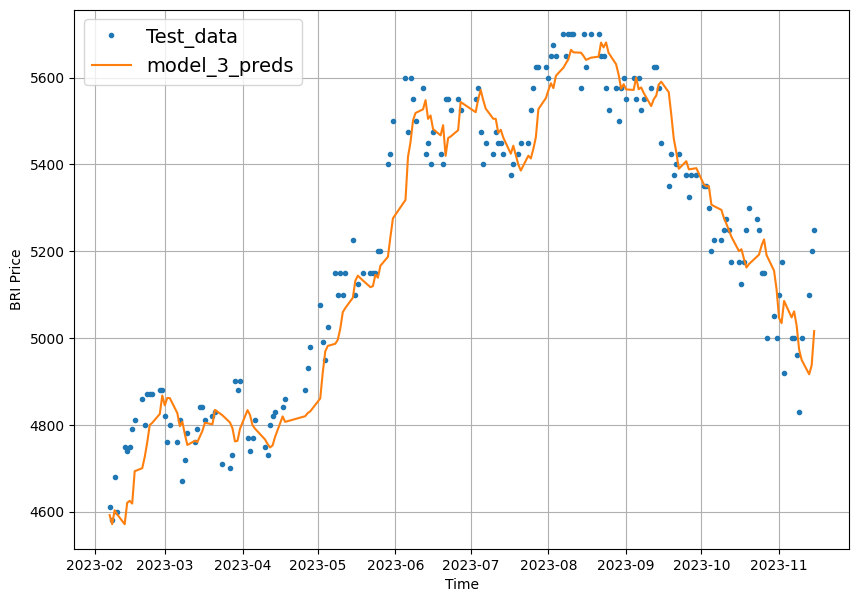

In [60]:
offset = 20
plt.figure(figsize=(10, 7))
# Plot model_3_preds by aggregating them (note: this condenses information so the preds will look fruther ahead than the test data)
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=tf.reduce_mean(model_3_preds, axis=1),
                 format="-",
                 start=offset,
                 label="model_3_preds")

### Best model from same with naive model

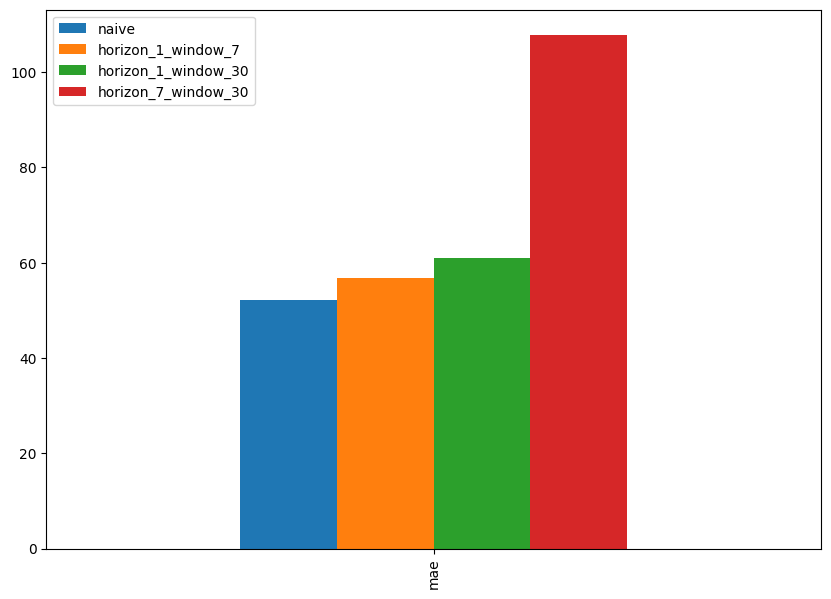

In [61]:
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

### Model 4: Conv1D

In [62]:
HORIZON = 1 # predict next day
WINDOW_SIZE = 7 # use previous week worth of data

In [63]:
# Create windowed dataset
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(1047, 1047)

In [64]:
# Create train/test splits
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(837, 210, 837, 210)

In [65]:
# Check data sample shapes
train_windows[0].shape # returns (WINDOW_SIZE, )

(7,)

In [66]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for timesteps
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # (WINDOW_SIZE, input_dim)
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
Original values with expanded shape:
 [[4460.]
 [4500.]
 [4480.]
 [4450.]
 [4450.]
 [4270.]
 [4100.]]


In [67]:
tf.random.set_seed(42)

# Create model
model_4 = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
model_4.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_4.name)])

In [68]:
model_4.summary()

Model: "model_4_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4737 (18.50 KB)
Trainable params: 4737 (18.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [69]:
# Load in best performing Conv1D model and evaluate it on the test data
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1D")
model_4.evaluate(test_windows, test_labels)

7/7 [==============================] - 0s 6ms/step - loss: 65.0876


65.0876235961914

In [70]:
# Make predictions
model_4_preds = make_preds(model_4, test_windows)
model_4_preds[:10]

7/7 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([4877.337 , 4898.9756, 4880.376 , 4871.4546, 4840.818 , 4781.776 ,
       4738.983 , 4695.871 , 4605.3433, 4533.584 ], dtype=float32)>

In [71]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 65.08762,
 'mse': 7047.978,
 'rmse': 83.95223,
 'mape': 1.2764235,
 'mase': 1.2480104}

### Model 5: RNN (LSTM)

In [72]:
tf.random.set_seed(42)

inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) # expand input dimension to be compatible with LSTM
# print(x.shape)
# x = layers.LSTM(128, activation="relu", return_sequences=True)(x) # this layer will error if the inputs are not the right shape
x = layers.LSTM(128, activation="relu")(x) # using the tanh loss function results in a massive error
# print(x.shape)
# x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")

# Compile model
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# https://github.com/tensorflow/tensorflow/issues/47554
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])

In [73]:
# Load in best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model("model_experiments/model_5_lstm/")
model_5.evaluate(test_windows, test_labels)

7/7 [==============================] - 0s 3ms/step - loss: 69.1268


69.12683868408203

In [74]:
# Make predictions with our LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:10]

7/7 [==============================] - 0s 2ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([4885.0024, 4900.4536, 4886.855 , 4886.9297, 4851.7666, 4795.314 ,
       4761.11  , 4721.1343, 4640.488 , 4575.4746], dtype=float32)>

In [75]:
# Evaluate model 5 preds
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results

{'mae': 69.12684,
 'mse': 7915.3916,
 'rmse': 88.96848,
 'mape': 1.3556795,
 'mase': 1.3254596}

### Model 6: N-BEATS algorithm

https://arxiv.org/pdf/1905.10437.pdf

In [95]:
# Create NBeatsBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self, # the constructor takes all the hyperparameters for the layer
               input_size: int,
               theta_size: int,
               horizon: int,
               n_neurons: int,
               n_layers: int,
               **kwargs): # the **kwargs argument takes care of all of the arguments for the parent class (input_shape, trainable, name)
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Block contains stack of 4 fully connected layers each has ReLU activation
    self.hidden = [tf.keras.layers.Dense(n_neurons, activation="relu") for _ in range(n_layers)]
    # Output of block is a theta layer with linear activation
    self.theta_layer = tf.keras.layers.Dense(theta_size, activation="linear", name="theta")

  def call(self, inputs): # the call method is what runs when the layer is called
    x = inputs
    for layer in self.hidden: # pass inputs through each hidden layer
      x = layer(x)
    theta = self.theta_layer(x)
    # Output the backcast and forecast from theta
    backcast, forecast = theta[:, :self.input_size], theta[:, -self.horizon:]
    return backcast, forecast

In [96]:
# Set up dummy NBeatsBlock layer to represent inputs and outputs
dummy_nbeats_block_layer = NBeatsBlock(input_size=WINDOW_SIZE,
                                       theta_size=WINDOW_SIZE+HORIZON, # backcast + forecast
                                       horizon=HORIZON,
                                       n_neurons=128,
                                       n_layers=4)

In [97]:
# Create dummy inputs (have to be same size as input_size)
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE) + 1, axis=0) # input shape to the model has to reflect Dense layer input requirements (ndim=2)
dummy_inputs

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[1, 2, 3, 4, 5, 6, 7]], dtype=int32)>

In [98]:
# Pass dummy inputs to dummy NBeatsBlock layer
backcast, forecast = dummy_nbeats_block_layer(dummy_inputs)
# These are the activation outputs of the theta layer (they'll be random due to no training of the model)
print(f"Backcast: {tf.squeeze(backcast.numpy())}")
print(f"Forecast: {tf.squeeze(forecast.numpy())}")

Backcast: [-0.65300804 -0.13687715 -0.0442448  -0.13619527  0.94950455 -0.43166462
 -0.0461894 ]
Forecast: -0.8675159215927124


### Preparing data for the N-BEATS algorithm using tf.data

In [99]:
HORIZON = 1 # how far to predict forward
WINDOW_SIZE = 7 # how far to lookback


In [100]:
# Create NBEATS data inputs (NBEATS works with univariate time series)
bri_prices.head()

,Price
date,
2019-07-29,4460.0
2019-07-30,4500.0
2019-07-31,4480.0
2019-08-01,4450.0
2019-08-02,4450.0


In [101]:
# Add windowed columns
bri_prices_nbeats = bri_prices.copy()
for i in range(WINDOW_SIZE):
  bri_prices_nbeats[f"Price+{i+1}"] = bri_prices_nbeats["Price"].shift(periods=i+1)
bri_prices_nbeats.dropna().head()

,Price,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
date,,,,,,,,
2019-08-07,4250.0,4100.0,4270.0,4450.0,4450.0,4480.0,4500.0,4460.0
2019-08-08,4290.0,4250.0,4100.0,4270.0,4450.0,4450.0,4480.0,4500.0
2019-08-09,4330.0,4290.0,4250.0,4100.0,4270.0,4450.0,4450.0,4480.0
2019-08-12,4300.0,4330.0,4290.0,4250.0,4100.0,4270.0,4450.0,4450.0
2019-08-13,4280.0,4300.0,4330.0,4290.0,4250.0,4100.0,4270.0,4450.0


In [102]:
# Make features and labels
X = bri_prices_nbeats.dropna().drop("Price", axis=1)
y = bri_prices_nbeats.dropna()["Price"]

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(837, 837, 210, 210)

In [103]:
# 1. Turn train and test arrays into tensor Datasets
train_features_dataset = tf.data.Dataset.from_tensor_slices(X_train)
train_labels_dataset = tf.data.Dataset.from_tensor_slices(y_train)

test_features_dataset = tf.data.Dataset.from_tensor_slices(X_test)
test_labels_dataset = tf.data.Dataset.from_tensor_slices(y_test)

# 2. Combine features & labels
train_dataset = tf.data.Dataset.zip((train_features_dataset, train_labels_dataset))
test_dataset = tf.data.Dataset.zip((test_features_dataset, test_labels_dataset))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
train_dataset = train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [104]:
# Values from N-BEATS paper Figure 1 and Table 18/Appendix D
N_EPOCHS = 5000 # called "Iterations" in Table 18
N_NEURONS = 512 # called "Width" in Table 18
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON # called "Lookback" in Table 18
THETA_SIZE = INPUT_SIZE + HORIZON

INPUT_SIZE, THETA_SIZE

(7, 8)

In [105]:
# Make tensors
tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

# Subtract
subtracted = layers.subtract([tensor_1, tensor_2])

# Add
added = layers.add([tensor_1, tensor_2])

print(f"Input tensors: {tensor_1.numpy()} & {tensor_2.numpy()}")
print(f"Subtracted: {subtracted.numpy()}")
print(f"Added: {added.numpy()}")

Input tensors: [10 11 12 13 14 15 16 17 18 19] & [0 1 2 3 4 5 6 7 8 9]
Subtracted: [10 10 10 10 10 10 10 10 10 10]
Added: [10 12 14 16 18 20 22 24 26 28]


In [106]:
%%time

tf.random.set_seed(42)

# 1. Setup N-BEATS Block layer
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create input to stacks
stack_input = layers.Input(shape=(INPUT_SIZE), name="stack_input")

# 3. Create initial backcast and forecast input (backwards predictions are referred to as residuals in the paper)
backcast, forecast = nbeats_block_layer(stack_input)
# Add in subtraction residual link, thank you to: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/174
residuals = layers.subtract([stack_input, backcast], name=f"subtract_00")

# 4. Create stacks of blocks
for i, _ in enumerate(range(N_STACKS-1)): # first stack is already creted in (3)

  # 5. Use the NBeatsBlock to calculate the backcast as well as block forecast
  backcast, block_forecast = NBeatsBlock(
      input_size=INPUT_SIZE,
      theta_size=THETA_SIZE,
      horizon=HORIZON,
      n_neurons=N_NEURONS,
      n_layers=N_LAYERS,
      name=f"NBeatsBlock_{i}"
  )(residuals) # pass it in residuals (the backcast)

  # 6. Create the double residual stacking
  residuals = layers.subtract([residuals, backcast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Put the stack model together
model_6 = tf.keras.Model(inputs=stack_input,
                         outputs=forecast,
                         name="model_6_N-BEATS")

# 8. Compile with MAE loss and Adam optimizer
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics=["mae", "mse"])

# 9. Fit the model with EarlyStopping and ReduceLROnPlateau callbacks
model_6.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0, # prevent large amounts of training outputs
            # callbacks=[create_model_checkpoint(model_name=stack_model.name)] # saving model every epoch consumes far too much time
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=200, restore_best_weights=True),
                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=100, verbose=1), create_model_checkpoint(model_name=model_6.name)])



Epoch 159: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 259: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
CPU times: user 6min 9s, sys: 8.48 s, total: 6min 18s
Wall time: 7min 23s


In [110]:
# Load in best version of model 6 and evaluate on the test data
model_6 = tf.keras.models.load_model("/content/model_experiments/model_6_N-BEATS/")
model_6.evaluate(test_dataset)

1/1 [==============================] - 1s 848ms/step - loss: 52.2122 - mae: 52.2122 - mse: 4787.4658


[52.212249755859375, 52.212249755859375, 4787.4658203125]

In [111]:
# Evaluate N-BEATS model on the test dataset
model_6.evaluate(test_dataset)

1/1 [==============================] - 0s 33ms/step - loss: 52.2122 - mae: 52.2122 - mse: 4787.4658


[52.212249755859375, 52.212249755859375, 4787.4658203125]

In [112]:
# Make predictions with N-BEATS model
model_6_preds = make_preds(model_6, test_dataset)
model_6_preds[:10]

1/1 [==============================] - 1s 749ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([4868.9844, 4908.2466, 4889.81  , 4852.2974, 4809.282 , 4699.1577,
       4646.0103, 4611.2485, 4496.536 , 4412.4067], dtype=float32)>

In [113]:
# Evaluate N-BEATS model predictions
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 52.21225,
 'mse': 4787.466,
 'rmse': 69.19151,
 'mape': 1.0232553,
 'mase': 1.0011339}

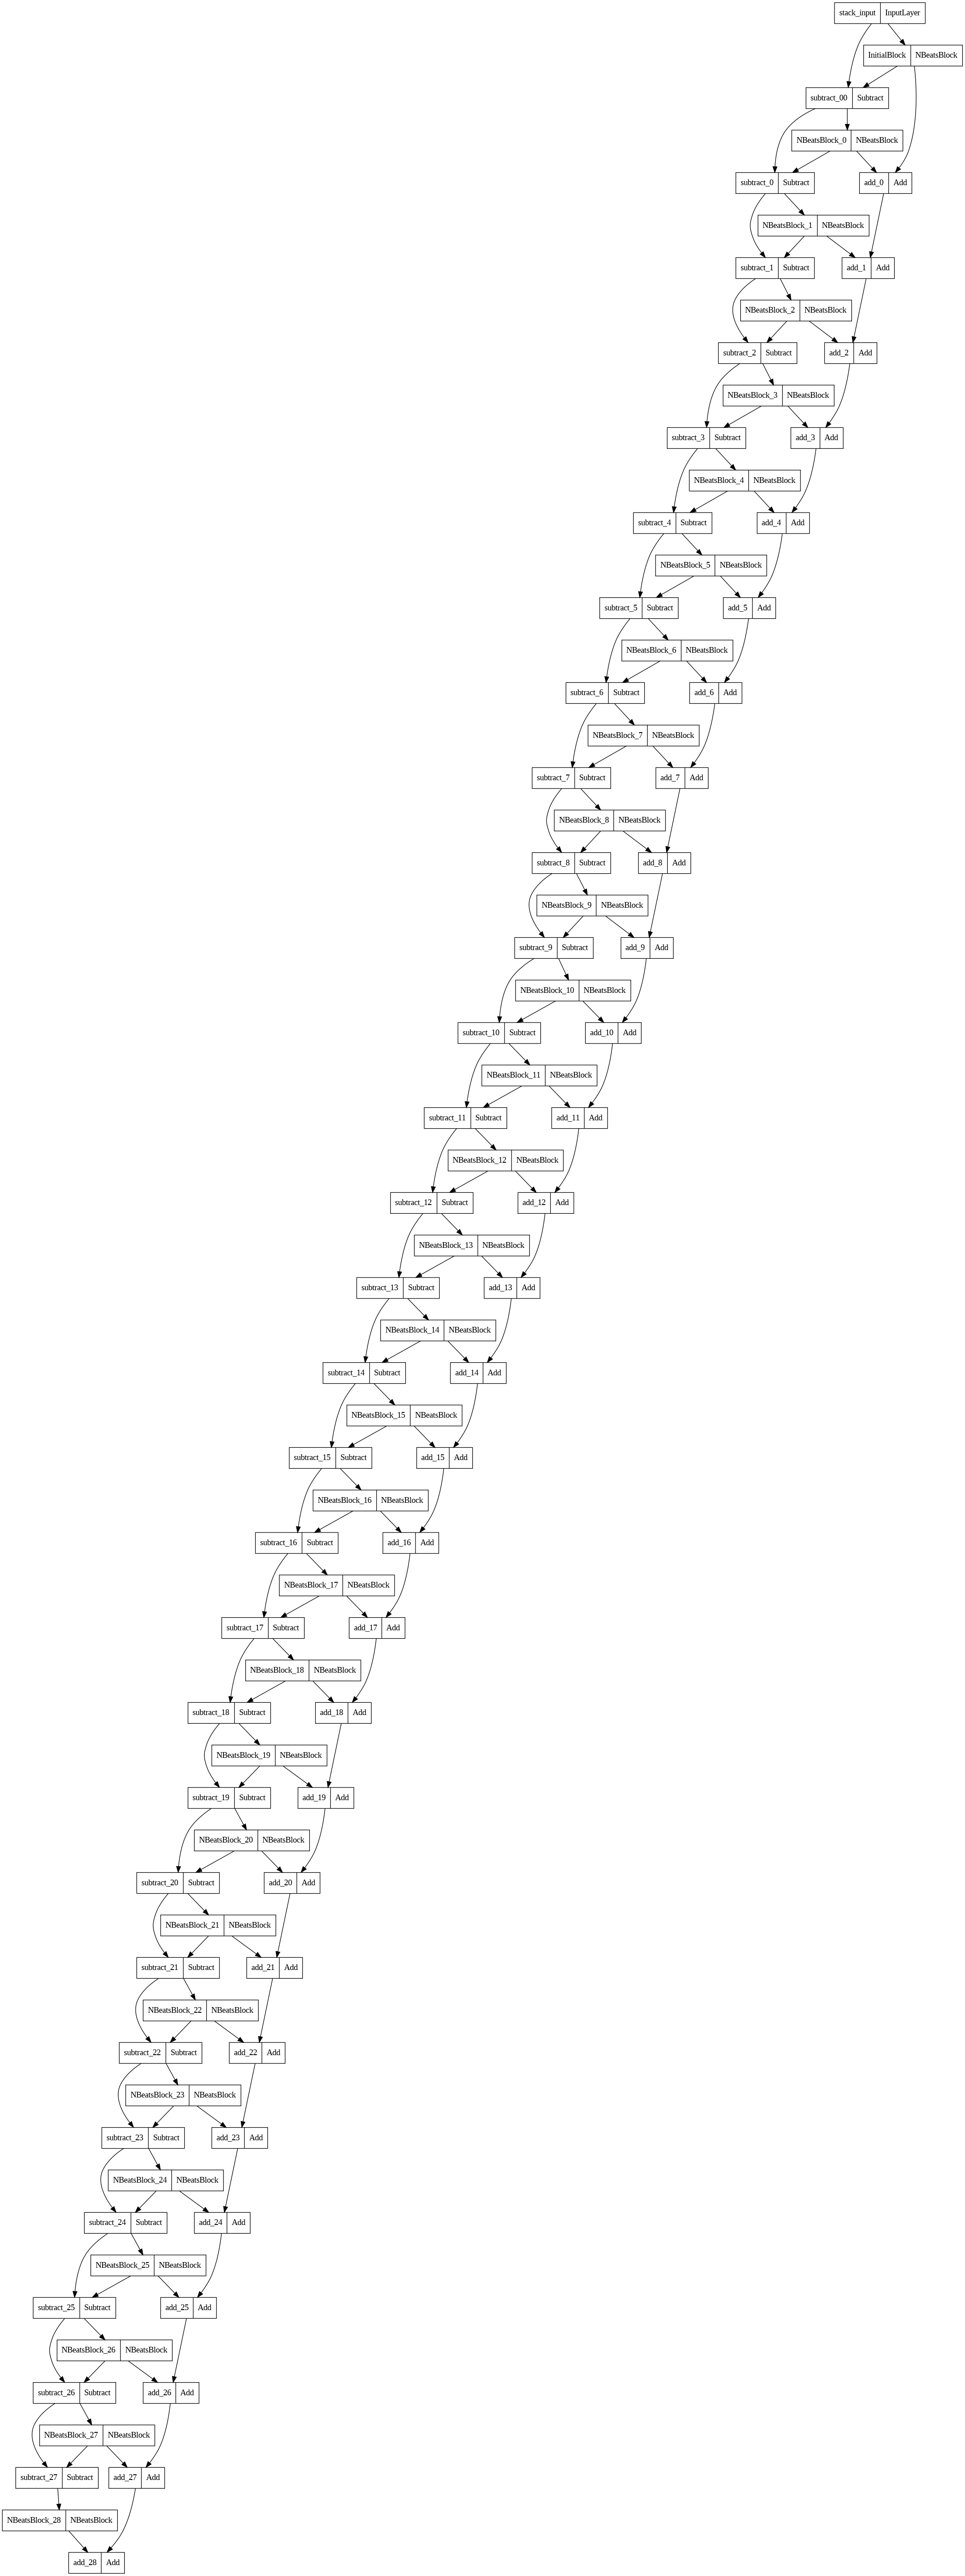

In [114]:
# Plot the N-BEATS model and inspect the architecture
from tensorflow.keras.utils import plot_model
plot_model(model_6)

# Compare Model

In [115]:
# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_NBEATS": model_6_results}).T
model_results.head(10)

,mae,mse,rmse,mape,mase
naive_model,52.238094,4601.666504,67.835587,1.020257,1.001629
model_1_dense_w7_h1,56.873680,5450.152832,73.825150,1.115989,1.090514
model_2_dense_w30_h1,61.057316,6243.333984,79.014771,1.194890,1.177287
model_3_dense_w30_h7,107.693047,19525.244141,122.646515,2.109128,2.094891
model_4_CONV1D,65.087624,7047.978027,83.952232,1.276423,1.248010
model_5_LSTM,69.126839,7915.391602,88.968483,1.355680,1.325460
model_6_NBEATS,52.212250,4787.465820,69.191513,1.023255,1.001134


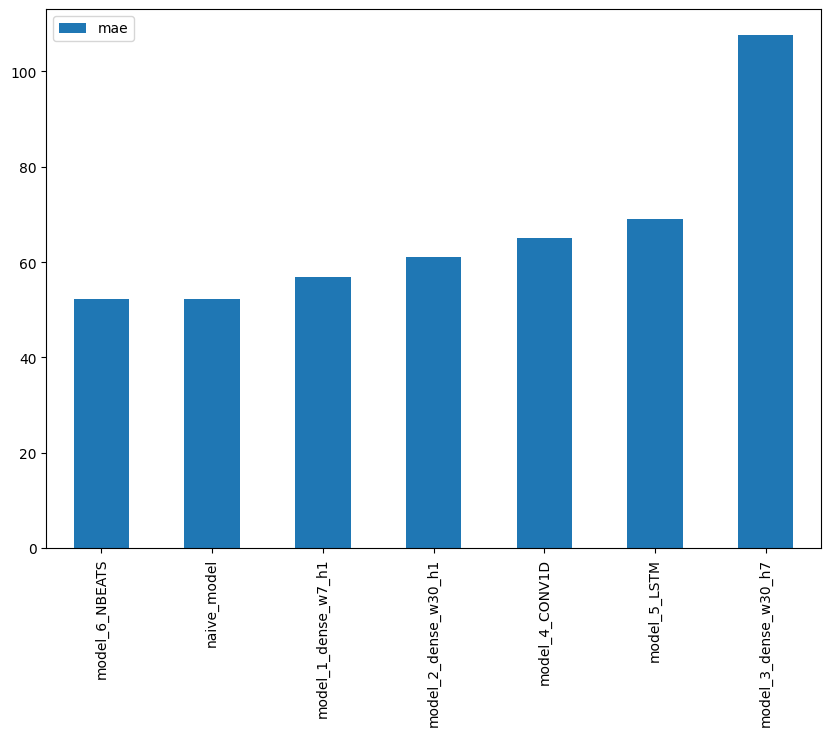

In [116]:
# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");

In [120]:
!zip -r model_6_N-BEATS.zip /content/model_experiments/model_6_N-BEATS

  adding: content/model_experiments/model_6_N-BEATS/ (stored 0%)
  adding: content/model_experiments/model_6_N-BEATS/saved_model.pb (deflated 92%)
  adding: content/model_experiments/model_6_N-BEATS/keras_metadata.pb (deflated 96%)
  adding: content/model_experiments/model_6_N-BEATS/variables/ (stored 0%)
  adding: content/model_experiments/model_6_N-BEATS/variables/variables.index (deflated 79%)
  adding: content/model_experiments/model_6_N-BEATS/variables/variables.data-00000-of-00001 (deflated 11%)
  adding: content/model_experiments/model_6_N-BEATS/fingerprint.pb (stored 0%)
  adding: content/model_experiments/model_6_N-BEATS/assets/ (stored 0%)


In [121]:
from google.colab import files
files.download('/content/model_6_N-BEATS.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>